# Lab 2: Analyzing the MoMA Data 🎨 🖼 🎞

Working on this lab should be a **collaborative effort**. We encourage you to work togheter with your group. If you do not work on your own notebook, make sure you demo to the TA/instructor as a group and share your work across the group after the lab.

## Objectives
1. Computing Summary Statistics from Data using `Pandas` 
2. Data Visualization using `matplotlib`
3. Posing and Answering a Data Questions



## Cheatsheets 📃
We have `Pandas` and `Matplotlib` **_CHEATSHEETS_** on Canvas. **Please, use them!!!!**


## Outline

1. [Recap: EDA Process](#Recap:-EDA-Process)
2. [Analyzing the MoMA Data](#Analyzing-the-MoMA-Data)
    1. [Step 1: Get the Data](#Step-1:-Get-the-Data)
    2. [Step 2: Data Wrangling](#Step-2:-Data-Wrangling)
    3. [Step 3: Data Profiling](#Step-3:-Data-Profiling)
    4. [Step 4: Develop Questions to Investigate](#Step-4:-Develop-Questions-to-Investigate)
    5. [Step 5: Investiage Hypothesis (Q1)](#Step-5:-Investiage-Hypothesis-(Q1))
    6. [Step 5: Investiage Hypothesis (Q2)](#Step-5:-Investiage-Hypothesis-(Q2))
    7. [Step 6: Answer More Questions](#Step-6:-Answer-More-Questions)

## Recap: EDA Process
Exploratory Data Analysis (EDA) is an approach to analyze and summarize data sets. 

<img src="utility/pics/EDA.png" alt="Drawing" style="width: 600px;"/>

(Business) goals require us to preform data analysis in order to answer/investigate a **data problem**. We begin with gaining a basic understanding of the data that is available. This understanding may require revisiting the (business) goals. Once an understanding is established the data needs to be prepared for modeling/analysis. This step includes some or all of the following data (pre-)processing:
* _data wrangling:_ parsing and formatting the data
* _data profiling_
* _data cleaning_

While creating models or analyzing the data (i.e., computing summary statistics, etc.), revisiting the data preparation phase is fairly common because of new discoveries or requirements. After the modelling phase we need to evaluate the model/findings, oftentimes using visualizations. Based on your findings you will have to revisit and possibly adapt your (business) goals and iterate over the entire EDA process again. Finally, once you have evaluated the model/data satisfactorily, it can be deployed into an internal workflow, as a report, or as an external process or product. 

## Analyzing the MoMA Data
1. Get the data and gain **basic understanding**
2. **Wrangle** the data
3. **Profile** the data
4. Develop questions to investigate (form a **hypotheses**)
5. Use the data to **investigate** hypothesis
6. **Summarize** results and answer questions 

## Step 1: Get the Data
In this lab we will be working with a dataset from the Museum of Modern Art in New York, also commonly referred to as  _MoMA_.  

![MoMA](utility/pics/MoMA.png)
We will be looking at:  
* Artworks 
* Artists
* Directors

### Download the Data
Download the data from the link provided in the `Readme.md` of your repository. 

Our dataset represents **all** of the works that have been accessioned into MoMA’s collection and cataloged in their database. An updated version of the data is publically available at https://github.com/MuseumofModernArt (do **not** use this version for our lab). 
Thanks to MoMA for releasing this dataset [http://dx.doi.org/10.5281/zenodo.1324595](http://dx.doi.org/10.5281/zenodo.1324595). Thanks to Chloe Mawer and Jonathan Whitmore to share their EDA work on this data!


### Before we Start

**Write-up!** Is this data _sample data_ or _population data_?

**Your response here:** 
This is population data since it is all of the works.

### Imports and Environment Setup
Run the following blocks of code to set up the lab environment.

In [1]:
# basic wrangling
import pandas as pd
from utility.util import clean_columns

# plotting
from matplotlib import pyplot as plt
from utility.util import plot_gender_fraction_over_time

### Load Raw Data

Let's load the data into a _Pandas data frame_. Pandas is a Pyhton library for data analysis; see https://pandas.pydata.org for more information. Also remeber that we have a **Pandas cheatsheet** on Canvas!

Conveniently pandas comes with a routine `read_csv` to load data from csv files into data frames (panda's data structure to store tabular data). This means that we are lucky and do not have to write a parser ourselves!

In [2]:
# Load data
artworks = pd.read_csv("./utility/data/Artworks.csv")

directors = pd.read_csv("./utility/data/MoMADirectorsDepartmentHeads.csv")

## Step 2: Data Wrangling

In [5]:
# Look at the table columns
artworks.columns

Index(['Title', 'Artist', 'ConstituentID', 'ArtistBio', 'Nationality',
       'BeginDate', 'EndDate', 'Gender', 'Date', 'Medium', 'Dimensions',
       'CreditLine', 'AccessionNumber', 'Classification', 'Department',
       'DateAcquired', 'Cataloged', 'ObjectID', 'URL', 'ThumbnailURL',
       'Circumference_cm', 'Depth_cm', 'Diameter_cm', 'Height_cm', 'Length_cm',
       'Weight_kg', 'Width_cm', 'Seat_Height_cm', 'Duration_sec'],
      dtype='object')

In [4]:
# Format the column names (this function is hidden in utility/util.py as it is not that important)
artworks = clean_columns(artworks)
directors = clean_columns(directors)

**Try this!** Look at the columns of both tables again to observe the changes. Simply run the cell block that looks at table columns again or add `artworks.columns` as the last statement in the cell above.

Let's look at some entries in the artworks dataframe. Note that a `DataFrame` is a generalized **numpy array**, so a lot of the things you learned about arrays apply to dataframes as well. 

By using our knowledge about the history of the MoMA, let's look at works acquired in the _first year_ of its opening (1929).

> **Warning**:  Pandas won't display _all_ rows and columns per default. If you need to see more of your data consider increasing `pd.options.display.max_columns` and `pd.options.display.max_rows`.

In [6]:
# Set pandas options to display all columns [Be careful if displaying huge dataframes!]
pd.options.display.max_columns = 50

artworks[artworks['DateAcquired'] < '1930-01-01']

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,Dimensions,CreditLine,AccessionNumber,Classification,Department,DateAcquired,Cataloged,ObjectID,URL,ThumbnailURL,Circumference_cm,Depth_cm,Diameter_cm,Height_cm,Length_cm,Weight_kg,Width_cm,Seat_Height_cm,Duration_sec
31567,Anna Peter,George Grosz,2374,"(American, born Germany. 1893–1959)",(American),(1893),(1959),(Male),(1926-27),Pencil on paper,"27 x 21 1/8"" (68.6 x 53.7 cm)",Gift of Paul J. Sachs,4.1929,Drawing,Drawings,1929-11-19,Y,32996,http://www.moma.org/collection/works/32996,http://www.moma.org/media/W1siZiIsIjg1OTk2Il0s...,NaN,NaN,NaN,68.580100,NaN,NaN,53.6576,NaN,NaN
55945,Self-Portrait (Selbstbildnis),Max Beckmann,429,"(German, 1884–1950)",(German),(1884),(1950),(Male),"1914, published 1918",Drypoint,"plate: 9 1/8 x 6 15/16"" (23.2 x 17.7 cm); shee...",Gift of Paul J. Sachs,1.1929,Print,Prints & Illustrated Books,1929-11-19,Y,59533,http://www.moma.org/collection/works/59533,http://www.moma.org/media/W1siZiIsIjE2NjE4MSJd...,NaN,NaN,NaN,238.760478,NaN,NaN,17.7000,NaN,NaN
55997,Before the Mirror (Vor dem Spiegel),Max Beckmann,429,"(German, 1884–1950)",(German),(1884),(1950),(Male),(1923),Drypoint,"plate: 8 15/16 x 6 7/8"" (22.7 x 17.4 cm); shee...",Gift of Paul J. Sachs,2.1929,Print,Prints & Illustrated Books,1929-11-19,Y,59585,http://www.moma.org/collection/works/59585,http://www.moma.org/media/W1siZiIsIjExNDY5NSJd...,NaN,NaN,NaN,22.700000,NaN,NaN,17.4000,NaN,NaN
56009,The Blessing of Heaven is Visibly upon Me (Got...,George Grosz,2374,"(American, born Germany. 1893–1959)",(American),(1893),(1959),(Male),(1922),Photolithograph,"composition (irreg.): 17 13/16 x 14 7/16"" (45....",Gift of Paul J. Sachs,3.1929,Print,Prints & Illustrated Books,1929-11-19,Y,59600,http://www.moma.org/collection/works/59600,http://www.moma.org/media/W1siZiIsIjEzNDg3MyJd...,NaN,NaN,NaN,45.300000,NaN,NaN,36.7000,NaN,NaN
56050,Marine,Lyonel Feininger,1832,"(American, 1871–1956)",(American),(1871),(1956),(Male),1918,Woodcut,"composition (irreg.): 6 5/8 x 8 7/8"" (16.8 x 2...",Gift of Paul J. Sachs,5.1929,Print,Prints & Illustrated Books,1929-11-19,Y,59646,http://www.moma.org/collection/works/59646,http://www.moma.org/media/W1siZiIsIjExNDcxOSJd...,NaN,NaN,NaN,16.800000,NaN,NaN,22.5000,NaN,NaN
56075,"Woman, Standing in the Garden (Frau, im Garten...",Oskar Kokoschka,3197,"(Austrian, 1886–1980)",(Austrian),(1886),(1980),(Male),(1916),Lithograph,"composition (irreg.): 9 13/16 x 5 11/16"" (24.9...",Gift of Paul J. Sachs,6.1929,Print,Prints & Illustrated Books,1929-11-19,Y,59673,http://www.moma.org/collection/works/59673,http://www.moma.org/media/W1siZiIsIjEyMjU0OCJd...,NaN,NaN,NaN,24.900000,NaN,NaN,14.5000,NaN,NaN
56109,Max Reinhardt (Head) (Kopf),Oskar Kokoschka,3197,"(Austrian, 1886–1980)",(Austrian),(1886),(1980),(Male),(1919),Lithograph,"composition (irreg. ): 15 3/16 x 11 15/16"" (38...",Gift of Paul J. Sachs,7.1929,Print,Prints & Illustrated Books,1929-11-19,Y,59708,http://www.moma.org/collection/works/59708,http://www.moma.org/media/W1siZiIsIjExOTMxOCJd...,NaN,NaN,NaN,38.600000,NaN,NaN,30.3000,NaN,NaN
56126,Dialogue (Zwiesprache),Max Pechstein,4533,"(German, 1881–1955)",(German),(1881),(1955),(Male),1920,Woodcut,"composition: 15 13/16 x 12 9/16"" (40.2 x 31.9 ...",Gift of Paul J. Sachs,8.1929,Print,Prints & Illustrated Books,1929-11-19,Y,59728,http://www.moma.org/collection/works/59728,http://www.moma.org/media/W1siZiIsIjExNDgzMCJd...,NaN,NaN,NaN,40.200000,NaN,NaN,31.9000,NaN,NaN
56159,The Lords of the World (Die Herren der Welt ),Georg Scholz,5260,"(German, 1890–1945)",(German),(1890),(1945),(Male),(1922),Lithograph,"composition: 11 3/4 x 15 3/4"" (29.8 x 40 cm); ...",Gift of Paul J. Sachs,9.1929,Print,Prints & Illustrated Books,1929-11-19,Y,59762,http://www.moma.org/collection/works/59762,http://www.moma.org/media/W1siZiIsIjEyMjcyMCJd...,NaN,NaN,NaN,29.845100,NaN,NaN,40.0000,NaN,NaN
129764,Songs for Swinging Larvae,Residents,34673,"(USA, est. 1972)",(Ame

> **Note**: In Pandas you can also do `artworks.DateAcquired` which is equivalent to `artworks['DateAcquired']`

**Write-up!** Look closely at the data. Note that you can scroll to the right to see more columns. Can you notice some interesting aspect in this sample of the data you would like to investigate further? Make a note in the cell below. 

**Your response here:** 
There was a film apparently obtained in 1216.

Did you already notice a flaw in this extremely small sample? Remebner you are looking at artworks from **before 1930**.  

...yes! Data is _always_ messy.

### Data Cleaning and Formatting
Let's clean up the messy data as we encounter it. If you know how to fix the data - do it. If you don't, make a note in your processing protocol and either remove the problematic data entry or leave it there keeping in mid that it might cause issues downstream. 

In [7]:
# Exclude (or fix) troublesome data as you discover it
artworks.loc[artworks[artworks.DateAcquired=='1216-10-18'].index, 'DateAcquired'] = '2016-10-18'

In [8]:
# Set the date to a datetime type
artworks['DateAcquired'] = pd.to_datetime(artworks['DateAcquired'])

## Step 3: Data Profiling

**Try this!** How many artworks does our dataset have? How many _features_? Get the number of artworks and number of features of the dataset. Luckily, you can use the same command as for numpy arrays!

In [9]:
# your code here 
artworks.shape

(135318, 29)

### Summary Statistics

Let's compute some basic summary statistics using Panda's powerful `describe()` function.
> **ProTip**: Since we have so many columns, let's `transpose()` the result for a better visulaization. 

#### Numeric Features 

The default for `describe()` is to give basic information for _numeric_ features only. 

In [10]:
artworks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ObjectID,135318.0,89077.211753,66364.477314,2.000,35740.250000,72346.500000,136672.75000,2.902360e+05
Circumference_cm,10.0,44.868020,28.631604,9.900,23.500000,36.000000,71.12500,8.380000e+01
Depth_cm,13044.0,16.757882,55.444451,0.000,0.000000,0.500000,10.20000,1.808484e+03
Diameter_cm,1416.0,23.167022,45.249009,0.635,7.800000,13.652500,24.77375,9.144000e+02
Height_cm,116271.0,37.565026,47.733617,0.000,18.097500,27.900000,44.00000,9.140000e+03
Length_cm,738.0,90.009375,330.313873,0.000,17.100000,26.700000,79.70000,8.321057e+03
Weight_kg,292.0,1274.855486,11976.608071,0.090,5.613300,19.844900,72.46210,1.850676e+05
Width_cm,115372.0,38.027593,66.681625,0.000,17.780036,25.400051,44.50000,9.144000e+03
Seat_Height_cm,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration_sec,3162.0,7688.498102,117037.360162,0.000,210.250000,720.000000,3639.75000,6.283065e+06


#### Categorical Features

To get some basic info for categorical features we need to specifically select the columns corresponding to those features - use `select_dtypes()` to get them. Some of the information - _especially for badly formatted features_ - will make not much sense (yet). 
 
> **Note**: Categorical features are encoded as strings in our dataset. To select strings in Pandas, use the `object` data type. 

In [11]:
artworks.select_dtypes(include='object').describe().transpose()

,count,unique,top,freq
Title,135279,97289,Untitled,7905
Artist,133882,14116,Eugène Atget,5050
ConstituentID,133882,14164,229,5050
ArtistBio,129899,8174,"(French, 1857–1927)",5050
Nationality,133882,1068,(American),56321
BeginDate,133882,2194,(0),7742
EndDate,133882,1264,(0),46640
Gender,133882,379,(Male),102307
Date,132913,9267,1967,1842
Medium,124064,20435,Gelatin silver print,15311


#### DateTime Features

For dates we additionally get the _first_ and the _last_ date in the data. 

**Try this!** Get the summary statistics for all columns with data type `datetime`.

In [12]:
# your code here 
artworks.select_dtypes(include='datetime').describe().transpose()

C:\Users\Hyrul\miniconda3\envs\cse217a\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,count,unique,top,freq,first,last
DateAcquired,128668,1925,1964-10-06,11219,1929-11-19,2018-05-24


**Write-up!** Look closely at the summary statistics of **all** features. Do you notice some interesting aspects in these statistics that you would like to investigate further? Make a note in the cell below. 

**Your response here:** 
It would be interesting to see the distribution of nationalities.

### Saving the Processed Data

Let's save the processed data so that we can use it later (in `hw2` without having to rerun the entire preprocessng again. 

> **Note**: `pickle` produces a rather large data file. It is best practice to **not** add (derived) data files to any repository (So, neither add this to your `Lab2` nor your `hw2` repo).

In [13]:
artworks.to_pickle('utility/data/processed_artworks.pickle') 

> **Hint**: To load your data for future use (in `hw2`) use: `df = pd.read_pickle(file_name)`

### Visualization of Individual Features

#### Feature: (Artwork) Classification
Let's investiage the classification of the artworks using a `bar plot`, since this is a _categorical_ variable.
> **[🐍 Matplotlib ProTip 🐍]**: you can use `plt.xticks()` to manipulate the lables for the axis ticks.    

Number of categories: 33
Most fequent category (mode): Photograph
Frequency of mode: 31353


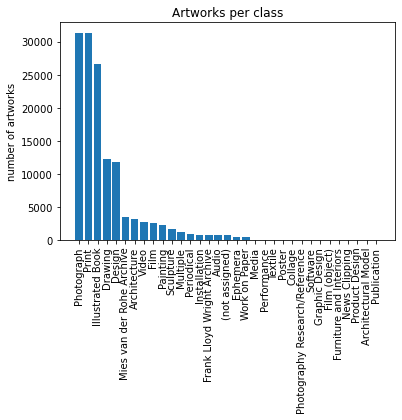

In [16]:
# Aggregated vaules
#print(artworks.Classification.value_counts())

# Summary statisitcs
print("Number of categories: " +str(artworks.Classification.unique().shape[0]))

cat_mode = artworks['Classification'].mode().values[0]
print("Most fequent category (mode): " + cat_mode)
print("Frequency of mode: " + str(artworks.Classification.value_counts()[cat_mode]))


# Bar plot
plt.bar(artworks['Classification'].value_counts().keys(),artworks['Classification'].value_counts().values)
plt.xticks(rotation=90)
plt.title("Artworks per class")
plt.ylabel("number of artworks")
plt.show();

# [OPTIONAL] the same plot can be generated using pandas plot functinality
#artworks['Classification'].value_counts().plot(kind='bar')

#### Select Your own Feature

> _Skip this step if your group is running slow._ Come back to this at the end of the lab if you still have time. 

**Challenge!** Visualize another (_categorical_) feature of your choice using an appropriate plot. Do **not** spend too much time on cleaning up your plot. If it looks messy, than this is due to the nature or foramtting of the data and the fact that you found out that your data is messy is already some very valuable information.

In [ ]:
# your code here 


## Step 4: Develop Questions to Investigate
We actually don't really know (yet) what we are trying to investiage in the MoMA data! By looking at the artworks acquired in 1929 you might have noticed that all artworks are from male artistis. Also the summary satistics tell us that there is an overwhelming fraction of artworks by male artistis. That's something to take a closer look at! So, here is an interesting question of investigation: 


> _What has impacted the representation of gender in the Museum of Modern Art?_

Now, this is an extremely broad question. Let's break this down into a bunch of smaller questions, for example: 

- **(Q1)** _How does the gender distribution of acquired works change over time?_
- **(Q2)** _How does the gender distribution of acquired works change with different museum directors?_

**Write-up!** Is there anything else that comes to your mind right now, that you want to investiagte? If so, make a note in the cell below: 

**Your response here:** 
How does the gender distribution of acquired works change with type of work?

### More Data Profiling and Cleaning
Okay, so let's look at some basic aggregate statistics with respect to artworks and artist gender. How many artworks from male and female artists did the MoMA acquire? 

#### Try #1: Panda's `groupby` function

In [17]:
artworks.groupby('Gender').count()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Date,Medium,Dimensions,CreditLine,AccessionNumber,Classification,Department,DateAcquired,Cataloged,ObjectID,URL,ThumbnailURL,Circumference_cm,Depth_cm,Diameter_cm,Height_cm,Length_cm,Weight_kg,Width_cm,Seat_Height_cm,Duration_sec
Gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,
(),6810,6810,6810,3399,6810,6810,6810,6645,6028,5578,6655,6810,6810,6810,6551,6810,6810,2938,2363,0,635,235,5433,111,2,5255,0,53
() (),160,160,160,71,160,160,160,159,153,153,160,160,160,160,159,160,160,63,43,0,18,5,145,5,0,144,0,4
() () (),27,27,27,22,27,27,27,27,25,27,27,27,27,27,27,27,27,24,11,0,7,1,24,0,0,24,0,0
() () () (),2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,0,0,0,2,1,0,2,0,0
() () () () (),2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,0,1,0,2,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
(Male) (Male) (Male) (Male) (Male) (Male) (Male) (Male) (Male) (Female) (Male),1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0
(Male) (Male) (Male) (Male) (Male) (Male) (Male) (Male) (Male) (Male) (Male) (Male) (Male) (Male) (Male) (Female) (Male),1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
(Male) (male),1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,1,0,0


**Oooooops** It looks like this data is even messier than expected! We will have to do _some_ work to get even this simple statistic. The main issue is that an artwork can have multiple artists. So, let's count the number of female and male artists for each artwork. 

#### Try #2: Do it Yourself
Let's create two new columns to store number of male and female artist for each artwork. 

In [18]:
# clean gender features to be all lowercase
artworks['Gender'] = artworks.Gender.str.lower()

artworks["num_males"] = artworks.Gender.apply(lambda x: str(x).count("(male)"))
artworks["num_females"] = artworks.Gender.apply(lambda x: str(x).count("(female)"))

Let's look at the result - BUT let's be conservative in how much data to display. 
> **Note**:  The `head()` function is very useful. It displays the first few entries/rows.

In [19]:
artworks.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,Dimensions,CreditLine,AccessionNumber,Classification,Department,DateAcquired,Cataloged,ObjectID,URL,ThumbnailURL,Circumference_cm,Depth_cm,Diameter_cm,Height_cm,Length_cm,Weight_kg,Width_cm,Seat_Height_cm,Duration_sec,num_males,num_females
0,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(male),1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",Fractional and promised gift of Jo Carole and ...,885.1996,Architecture,Architecture & Design,1996-04-09,Y,2,http://www.moma.org/collection/works/2,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN,1,0
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(male),1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",Gift of the architect in honor of Lily Auchinc...,1.1995,Architecture,Architecture & Design,1995-01-17,Y,3,http://www.moma.org/collection/works/3,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN,1,0
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(male),1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",Gift of Jo Carole and Ronald S. Lauder,1.1997,Architecture,Architecture & Design,1997-01-15,Y,4,http://www.moma.org/collection/works/4,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN,1,0
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(male),1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",Purchase and partial gift of the architect in ...,2.1995,Architecture,Architecture & Design,1995-01-17,Y,5,http://www.moma.org/collection/works/5,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN,1,0
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(male),1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",Gift of Jo Carole and Ronald S. Lauder,2.1997,Architecture,Architecture & Design,1997-01-15,Y,6,http://www.moma.org/collection/works/6,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN,1,0


Observe the gender column and also the newly added last two columns aggregting the number of male and female artisits of each artwork respectively. Let's look at the most recently acquired artworks (note that our data does not include the most recent aquisitions). 

**Try this!** Display all artworks acquired after May 20th 2018 and only display the columns `DateAcquired`, `Gender`, `num_males`, and 	`num_females`. 

In [21]:
artworks.loc[artworks['DateAcquired'] > '2018-05-20',['DateAcquired', 'Gender', 'num_males', 'num_females']]

,DateAcquired,Gender,num_males,num_females
122071,2018-05-23,(female),0,1
125775,2018-05-23,(male),1,0
130694,2018-05-24,(male),1,0
132356,2018-05-24,(male),1,0
132361,2018-05-24,(male),1,0
...,...,...,...,...
134975,2018-05-23,(male),1,0
134976,2018-05-23,(male),1,0
134977,2018-05-23,(male),1,0
134978,2018-05-23,(male),1,0


## Step 5: Investiage Hypothesis (Q1)

### Gender Representation: Number of MoMA Artworks by Gender

In [22]:
# works by male artist(s)
works_man = artworks[(artworks.num_males>0) & (artworks.num_females==0)]
print("Number of artworks by male artisits: "+str(works_man['Gender'].count()))

Number of artworks by male artisits: 106897


**Try This!** Compute the number of artworks from female artists (_one or mutliple female artisits, no male artists_) and the number of artworks that have both male and female artists (_at least one male and one female artist_). 

In [23]:
# your code here 
works_woman = artworks[(artworks.num_females>0) & (artworks.num_males==0)]
print("Number of artworks by female artisits: "+str(works_woman['Gender'].count()))

works_both = artworks[(artworks.num_males>0) & (artworks.num_females>0)]
print("Number of artworks by both male and female artisits: "+str(works_both['Gender'].count()))

Number of artworks by female artisits: 17638
Number of artworks by both male and female artisits: 2345


### Trend Analysis: Visualization of Gender Representation over Time

Now, let's plot the number of MoMA artworks over time using `plot(x,y)` to produce a _line plot_ where `x` is DateAcquired and `y` is the cummulative number of artworks. 

> **Note**: we create a helper dataframe `df`, sort it by date, add a column of 1's, and then use panda's `cumsum()` to get the cumulative counts.  

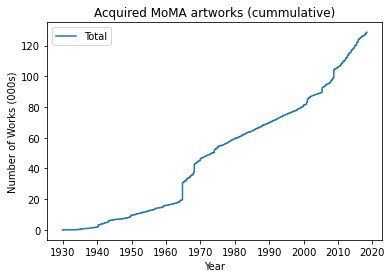

In [24]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


def plot_num_artwork_over_time(df, title=None):
    """Calculates cumulative number of artworks. Plots the values over time."""
    
    # Drop entries where date is not defined
    df = df[df['DateAcquired'].notnull()]
    
    # Sort by date
    df = df.sort_values(by='DateAcquired')
    
    # Add artworks acquired
    df['ones'] = 1
    df['num_acquired'] = df.ones.cumsum()
    
    # Plot (this is a line plot)
    plt.plot(df.DateAcquired,df['num_acquired']/1000, label='Total')
   
    plt.xlabel("Year")
    plt.ylabel("Number of Works (000s)")
    if title:
        plt.title(title)
    plt.legend()
    plt.show()

plot_num_artwork_over_time(artworks, title="Acquired MoMA artworks (cummulative)")

Great. Now, we can add the cumulative number of artworks by gender to this plot. Insted of adding up all 1's we will now only add up the works by male artisits. 

> **Note**: we will creat another helper dataframe `works_man` with the works of male artisits only. Then use `cumsum()` on the 1's column again.   

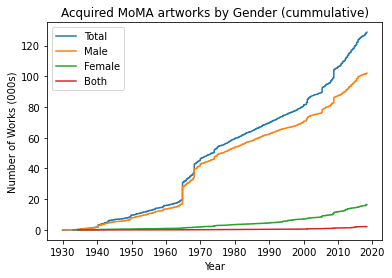

In [27]:
def plot_gender_breakdown_over_time(df, title=None):
    """Calculates cumulative number of artworks by gender. Plots the values over time."""
    
    # Drop entries where date is not defined
    df = df[df['DateAcquired'].notnull()]
    
    # Sort by date
    df = df.sort_values(by='DateAcquired')
    
    # Add artworks acquired
    df['ones'] = 1
    df['num_acquired'] = df.ones.cumsum()
    
    works_man = df[(df.num_males>0) & (df.num_females==0)].copy()   # works by male artist(s)
    works_man['num_acquired'] = works_man.ones.cumsum()
    
    works_woman = df[(df.num_females>0) & (df.num_males==0)].copy()
    works_woman['num_acquired'] = works_woman.ones.cumsum()
    
    works_both = df[(df.num_females>0) & (df.num_males>0)].copy()
    works_both['num_acquired'] = works_both.ones.cumsum()
    
    # your code here 

    
    # Plot
    plt.plot(df.DateAcquired,df['num_acquired']/1000, label='Total')
    plt.plot(works_man.DateAcquired,works_man['num_acquired']/1000, label='Male')
    plt.plot(works_woman.DateAcquired,works_woman['num_acquired']/1000, label='Female')
    plt.plot(works_both.DateAcquired,works_both['num_acquired']/1000, label='Both')
    
    
    # your code here 

    
    plt.xlabel("Year")
    plt.ylabel("Number of Works (000s)")
    if title:
        plt.title(title)
    plt.legend()
    plt.show()
    
plot_gender_breakdown_over_time(artworks, title="Acquired MoMA artworks by Gender (cummulative)")

**Try This!** In the function `plot_gender_breakdown_over_time` above add two more lines to the plot, one for artworks from female artists (_one ore mutliple female artisits, no male artists_) and one for artworks from both male and female artists (_at least one male and one female artist_). 

> **Hint**: This is very similar to when you computed the counts. Be lazy and copy your code from above!

### Fraction Analysis: Visualization of Fraction of MoMA Artworks By Female Artists per Year

Sometimes it's a good idea to look at fractions insted of absolute numbers to account for times where more or less total number of artworks were acquired. We will begin by computing the _gender fractions of each artwork_. To do this we add two more columns to the `artworks` dataframe: `frac_males` and `frac_females`.
> The fraction entry will be 0 for one of the two new columns and 1 for the other for every artwork that has a single artist. It will be 0.5 for both if it as one artist of each gender, it will be 0.33 and 0.66 for artowkrs with two artistis of one gender and one artist  of the other gender, etc. 

In [29]:
artworks["frac_males"] = artworks.num_males.divide(artworks.num_males + artworks.num_females)
artworks["frac_females"] = artworks.num_females.divide(artworks.num_males + artworks.num_females)

# Verify that our fractions are correct 
# --> execute this cell a couple of times
# --> you want to see a sample artwork with artists of both genders and check the fractions
artworks.sample(25)[['DateAcquired','Gender', 'num_males', 'num_females', 'frac_males', 'frac_females']]

,DateAcquired,Gender,num_males,num_females,frac_males,frac_females
41156,1968-03-06,(male),1,0,1.000000,0.000000
92241,2007-11-13,(male),1,0,1.000000,0.000000
57310,1995-01-24,(female),0,1,0.000000,1.000000
90147,NaT,(female),0,1,0.000000,1.000000
75927,2001-05-08,(female),0,1,0.000000,1.000000
108622,NaT,(male),1,0,1.000000,0.000000
79119,1942-01-27,(male),1,0,1.000000,0.000000
108151,2012-10-03,(female),0,1,0.000000,1.000000
31477,1967-12-13,(male),1,0,1.000000,0.000000
46134,1995-06-15,(male) (female),1,1,0.500000,0.500000


Use panda's `mean()` function to get the fraction of artworks by each gender.

In [30]:
print("Fraction of MoMA artworks by male artists:    " + str(artworks.frac_males.mean()))
print("Fraction of MoMA artworks by female artists:  " + str(artworks.frac_females.mean()))

Fraction of MoMA artworks by male artists:    0.8531213615561382
Fraction of MoMA artworks by female artists:  0.1468786384438619


Now, let's take a look at the gender fractions of art aquisitions by year.
> **Note**: We implemented this ploting function for you. It is in `utility\util.py`. Looking at the code is totally **optional**. If you are interested in this, look at it after completing the lab.  

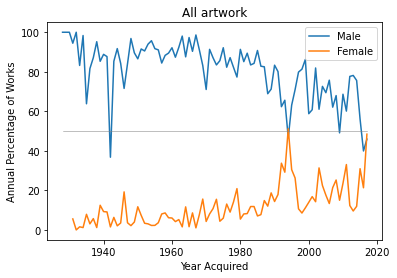

In [31]:
plot_gender_fraction_over_time(artworks, title="All artwork")

Great! This is a pretty informative visualizations. 

### Summarize (Q1) Results

Answer your first question: **(Q1)** _How does the gender distribution of acquired works change over time?_

**Write-up!** Describe the results from the **trend** and **fraction** analysis including anything you find notable or surprising. Keep a note on any further questions you might have. 

## Step 5: Investiage Hypothesis (Q2)

### Gender Representation By Director

First, we'll have to do some data cleaning on the `directors` table, such as extracting the MoMA directors. Then we will add the `Director_ID` to the `artworks` table. 

In [32]:
# Extract MoMA directors
moma_directors = directors[directors.DepartmentFullName=='The Museum of Modern Art']
moma_directors

,DepartmentFullName,DepartmentBeginYear,DepartmentEndYear,ConstituentID,DisplayName,PositionNote,PositionBeginYear,PositionEndYear,ConstituentType,AlphaSort,FirstName,MiddleName,LastName,Suffix,Nationality,ConstituentBeginDate,ConstituentEndDate,ArtistBio,Gender,VIAFID,WikidataID,ULANID
0,The Museum of Modern Art,1929,NaN,9168.0,"Alfred H. Barr, Jr.",Director,1929,1943.0,Individual,Barr Alfred H. Jr.,Alfred,H.,Barr,Jr.,American,1902.0,1981.0,"American, 1902–1981",Male,109252853.0,Q711362,500241556.0
1,The Museum of Modern Art,1929,NaN,10779.0,René d'Harnoncourt,Director,1949,1968.0,Individual,d'Harnoncourt René,René,NaN,d'Harnoncourt,NaN,American,1901.0,1968.0,"American, 1901–1968",Male,176768.0,Q7312958,500071210.0
2,The Museum of Modern Art,1929,NaN,11389.0,Bates Lowry,Director,1968,1969.0,Individual,Lowry Bates,Bates,NaN,Lowry,NaN,American,1924.0,2004.0,"American, 1924–2004",Male,71883331.0,Q4868805,500279878.0
3,The Museum of Modern Art,1929,NaN,NaN,John B. Hightower,Director,1970,1972.0,Individual,Hightower John B.,John,Brantley,Hightower,NaN,American,1933.0,2013.0,"American, 1933–2013",Male,65771126.0,Q15431531,NaN
4,The Museum of Modern Art,1929,NaN,13047.0,Richard E. Oldenburg,Director,1972,1994.0,Individual,Oldenburg Richard E.,Richard,E.,Oldenburg,NaN,American,1933.0,NaN,"American, born 1933",Male,22054670.0,Q7328159,NaN
5,The Museum of Modern Art,1929,NaN,30333.0,Glenn D. Lowry,Director,1995,NaN,Individual,Lowry Glenn D.,Glenn,D.,Lowry,NaN,American,1954.0,NaN,"American, born 1954",Male,165457793.0,Q5568749,500251278.0


In [33]:
# Add director ID of director acquiring the work to artworks table
def get_director(year):
    """Given the year of artwork acquisition provide the director ID."""
    for director_ID in moma_directors.index:
        if year < moma_directors.sort_values(
                by="PositionBeginYear").loc[director_ID, "PositionEndYear"]:
            return int(director_ID)
    return int(director_ID)

try:
    artworks = pd.read_csv("./utility/data/artworks_with_director.csv", )
    artworks['DateAcquired'] = pd.to_datetime(artworks['DateAcquired'])
    print("Loaded precomputed data.")
except:
    print("This will take a couple of minutes.")
    artworks["Director_ID"] = artworks.DateAcquired.apply(lambda x: get_director(x.year))
    artworks.to_csv("./utility/data/artworks_with_director.csv", index=False)
    artworks['DateAcquired'] = pd.to_datetime(artworks['DateAcquired'])
    print("Completed cell block")

Loaded precomputed data.


 Let's make sure it's there by indexing the dataframe using `iloc`. 
 > **Remember**: dataframes are general arrays so indexing works similar to `numpy` arrays. 

In [34]:
# get the first and last column of the first 5 entries
artworks.iloc[:5, [0,-1]]

,Title,Director_ID
0,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",5
1,"City of Music, National Superior Conservatory ...",5
2,"Villa near Vienna Project, Outside Vienna, Aus...",5
3,"The Manhattan Transcripts Project, New York, N...",5
4,"Villa, project, outside Vienna, Austria, Exter...",5


Now, let's compute the fraction of artworks by female artists acquired by each MoMA director normalized by the length of each director's appointment (using `groupby("Director_ID")` and `mean()`). Based on these numbers we can then get the fractions of artworks from female artists per year. 

In [35]:
frac_female_by_dir = artworks.groupby("Director_ID").frac_females.mean()
new = moma_directors.join(frac_female_by_dir)
new[["DisplayName","frac_females"]]

,DisplayName,frac_females
0,"Alfred H. Barr, Jr.",0.081695
1,René d'Harnoncourt,0.044469
2,Bates Lowry,0.010676
3,John B. Hightower,0.099834
4,Richard E. Oldenburg,0.136756
5,Glenn D. Lowry,0.234761


**Try this!** Create a bar plot of MoMA directors versus the fraction of acquired artworks by female artists. 

> Hint: check the example visualizing a categorical feature we provided in **Step 3: Data Profiling**.

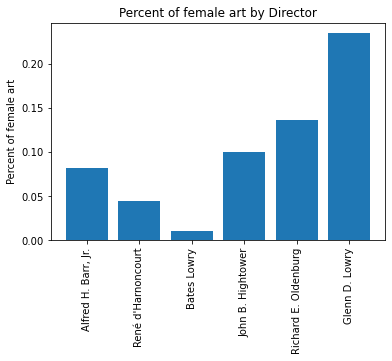

In [43]:
# your code here 
plt.bar(new['DisplayName'],new['frac_females'])
plt.xticks(rotation=90)
plt.title("Percent of female art by Director")
plt.ylabel("Percent of female art")
plt.show();



### Summarize (Q2) Results 

Answer your second question: **(Q2)** _How does the gender distribution of acquired works change with different museum directors?_

**Write-up!** Summarize your results on the gender representation by differnt museum directors. Highlight, anything you find notable or surprising and keep a note on any further questions you might have. 

## Step 6: Answer More Questions

We will show you a couple of cool insights and try to answer some of your unsanswered quesions at the beginning of next lecture. 

**Challenge!** Feel free to play with the data and investigate anything you noted or found surprising further as an optional excercise!

In [ ]:
# BEGIN SOLUTION



# END SOLUTON

## Do skipped Challenges
> _If you skipped some challenges above go back and do those now or after the lab._ We will assume that you have practiced creating plots in our future labs and hws. 


## Some Takeaways: 

- Data Science is not _only_ about answering questions, but also about **posing questions**. 
- Posing questions is harder than you would expect. 
- Answering questions can often be as tricky as coming up with the question.
- Intricacies in how the data is collected or generated can impact how you can answer the question.
- Aim to remain assumption free throughout your analysis!